### 1. 데이터셋 준비

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
60000


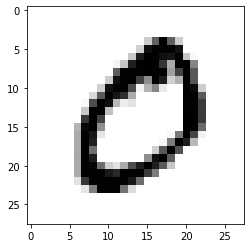

0


In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()
print(y_train[1])

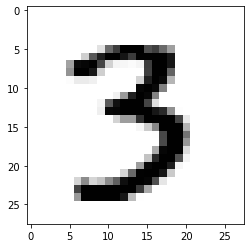

10001 번째 이미지의 숫자는 바로  3 입니다.


In [3]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


### 2. 딥러닝 모델 설계하기

In [6]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

### 3. 딥러닝 모델 학습시키기

In [9]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2118 - accuracy: 0.9351
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0700 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.013

### 4. 테스트 데이터로 실험

In [11]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0365 - accuracy: 0.9903
test_loss: 0.036467671394348145 
test_accuracy: 0.9902999997138977


In [12]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.11436874e-14 1.21654152e-12 1.13047272e-09 1.53148108e-07
 3.81301876e-14 3.84419296e-14 3.97570299e-18 9.99999881e-01
 1.19833324e-10 1.09109184e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


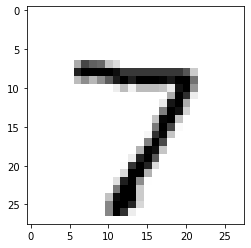

In [13]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

잘못 인식한 경우 확인하기

예측확률분포: [2.5531164e-11 7.3525129e-08 9.7206255e-05 1.1896727e-09 1.8681942e-05
 9.6821218e-10 3.2496603e-11 9.9987376e-01 1.0193547e-05 5.5514343e-10]
라벨: 2, 예측결과: 7


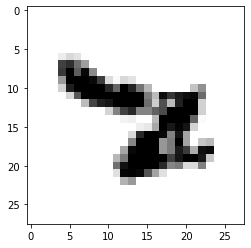

예측확률분포: [4.6384367e-09 2.0305160e-08 2.1716582e-09 3.8517435e-04 4.8317802e-01
 2.7791981e-04 5.1137206e-12 1.4382316e-05 5.3954317e-04 5.1560497e-01]
라벨: 4, 예측결과: 9


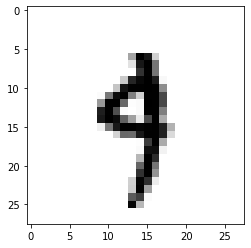

예측확률분포: [8.32442226e-10 2.02415094e-06 1.09233424e-01 1.32657924e-05
 4.39808373e-13 4.30833022e-13 1.25177815e-14 8.90689135e-01
 6.11158248e-05 1.05397851e-06]
라벨: 2, 예측결과: 7


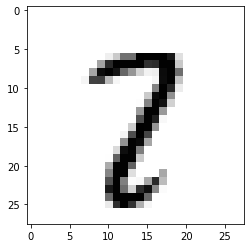

예측확률분포: [6.6827704e-07 8.8973530e-03 1.3096489e-04 3.5042595e-03 4.2962486e-01
 8.0203415e-07 1.4058227e-08 5.4302162e-01 7.9285018e-03 6.8909219e-03]
라벨: 4, 예측결과: 7


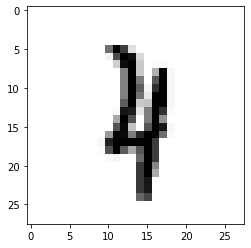

예측확률분포: [5.8057881e-10 4.4552283e-04 9.9391210e-01 4.3129508e-05 2.0489779e-04
 1.4290916e-08 1.0940707e-08 1.5557952e-03 3.8385070e-03 1.1793549e-07]
라벨: 8, 예측결과: 2


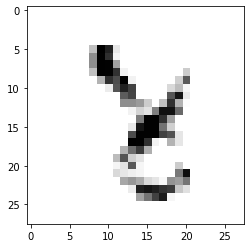

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 하이퍼파라미터를 바꿔가며 테스트해보기

In [15]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [16]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=24
n_channel_2=48
n_dense=48
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 48)        10416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 48)                57648     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               